<a href="https://colab.research.google.com/github/alex-pakalniskis/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module2-make-features/LS_DS_112_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
##### Begin Working Here #####

In [0]:
import pandas as pd
import google.colab.files as files
import seaborn as sns
sns.set(palette="colorblind")


In [0]:
files.upload()

Saving LoanStats_2017Q1_2.csv to LoanStats_2017Q1_2.csv


In [11]:
!head /content/LoanStats_2017Q1_2.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_il_6m","ope

In [12]:
!tail /content/LoanStats_2017Q1_2.csv


"","","10400","10400","10400"," 36 months"," 14.99%","360.47","C","C4","Glaze Operator","5 years","RENT","26000","Source Verified","Jan-2017","Current","n","","","debt_consolidation","Debt consolidation","657xx","MO","18.56","0","Mar-2006","0","","","3","0","3901","70.9%","7","f","9699.65","9699.65","1072.75","1072.75","700.35","372.40","0.0","0.0","0.0","Apr-2017","360.47","May-2017","Apr-2017","0","","1","INDIVIDUAL","","","","0","0","9173","0","1","0","1","18","5272","58","0","0","3887","63","5500","0","0","0","1","3058","1599","70.9","0","0","103","129","74","18","0","74","","","","0","2","2","2","2","5","2","2","2","3","0","0","0","0","100","50","0","0","14600","9173","5500","9100","","","","","","","","","","",""
"","","30000","30000","30000"," 60 months"," 21.49%","819.9","D","D5","Teacher Department Head","10+ years","MORTGAGE","60000","Verified","Jan-2017","Current","n","","","debt_consolidation","Debt consolidation","615xx","IL","43","1","Nov-1999","3","11","","21","0","29102

In [13]:
df = pd.read_csv("LoanStats_2017Q1_2.csv", skiprows=1, skipfooter=2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [25]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
0,NaN,NaN,3600,3600,3600,36 months,7.49%,111.97,A,A4,Code/Compliance Inspector,10+ years,MORTGAGE,120000.0,Not Verified,Mar-2017,Issued,n,NaN,NaN,other,Other,467xx,IN,18.90,0,Aug-1992,1,NaN,96.0,18,1,5658,14.9%,33,w,3600.00,3600.00,0.00,0.00,...,3,2,0,9.0,NaN,2.0,NaN,0,1,4,2,3,17,12,16,4,18,0.0,0,0,6,100.0,0.0,1,0,93599,36506,9000,55699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,15000,15000,15000,60 months,14.99%,356.78,C,C4,Senior Superintendent,10+ years,MORTGAGE,125000.0,Not Verified,Mar-2017,Issued,n,NaN,NaN,other,Other,064xx,CT,17.25,0,Sep-1989,0,NaN,NaN,11,0,53167,75.3%,18,w,15000.00,15000.00,0.00,0.00,...,16,16,2,16.0,NaN,16.0,NaN,0,5,7,6,8,6,8,10,7,11,0.0,0,0,0,100.0,66.7,0,0,148572,69364,60300,30224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,8400,8400,8400,36 months,11.39%,276.56,B,B3,IT Tech,8 years,MORTGAGE,50000.0,Source Verified,Mar-2017,Issued,n,NaN,NaN,other,Other,454xx,OH,15.63,0,Apr-2005,0,NaN,NaN,14,0,12831,30.3%,30,w,8400.00,8400.00,0.00,0.00,...,4,4,4,4.0,NaN,10.0,NaN,0,4,5,7,11,9,11,16,5,14,0.0,0,0,5,100.0,14.3,0,0,205671,51591,36100,36876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000,36 months,10.49%,130.00,B,B2,Dental hygienist,2 years,RENT,50000.0,Source Verified,Mar-2017,Issued,n,NaN,NaN,major_purchase,Major purchase,768xx,TX,33.61,1,Apr-2003,0,6.0,37.0,10,1,4388,33.2%,33,w,4000.00,4000.00,0.00,0.00,...,15,7,6,120.0,NaN,9.0,61.0,1,1,4,1,3,15,6,12,4,10,0.0,0,0,1,87.5,100.0,0,0,152852,136208,2500,139652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,6000,6000,6000,36 months,7.24%,185.93,A,A3,Program Manager,3 years,RENT,125000.0,Source Verified,Mar-2017,Current,n,NaN,NaN,credit_card,Credit card refinancing,981xx,WA,9.25,0,Jul-2004,1,54.0,NaN,16,0,9571,41.3%,27,w,5850.27,5850.27,164.21,164.21,...,7,3,0,7.0,NaN,4.0,NaN,9,3,3,5,5,22,5,5,3,16,0.0,0,0,3,59.1,20.0,0,0,72865,60622,23200,49665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
96774,NaN,NaN,30000,30000,30000,60 months,21.49%,819.90,D,D5,Teacher Department Head,10+ years,MORTGAGE,60000.0,Verified,Jan-2017,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,615xx,IL,43.00,1,Nov-1999,3,11.0,NaN,21,0,29102,94.8%,38,f,29136.77,29136.77,2423.88,2423.88,...,48,5,2,112.0,34.0,0.0,34.0,2,2,4,2,4,28,5,8,4,21,0.0,0,0,1,68.4,100.0,0,0,468032,157269,8400,172223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96775,NaN,NaN,15000,15000,15000,36 months,12.74%,503.54,C,C1,Senior Product Manager,2 years,RENT,110500.0,Source Verified,Jan-2017,Current,n,NaN,NaN,credit_card,Credit card refinancing,802xx,CO,4.95,0,Feb-2011,2,NaN,NaN,13,0,16900,29.2%,15,f,13750.26,13750.26,1736.67,1736.67,...,3,3,0,3.0,NaN,4.0,NaN,0,6,6,12,13,1,12,14,6,13,0.0,0,0,4,100.0,25.0,0,0,65300,21566,57800,7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96776,NaN,NaN,10000,10000,10000,36 months,8.24%,314.48,B,B1,NaN,NaN,MORTGAGE,46203.0,Not Verified,Jan-2017,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,342xx,FL,17.04,0,Nov-2002,0,38.0,NaN,8,0,7315,51.2%,15,f,9257.48,9257.48,934.28,934.28,...,25,18,1,25.0,38.0,NaN,38.0,0,3,3,4,6,5,6,9,3,8,0.0,0,0,0,86.7,25.0,0,0,263677,24752,12800,21877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96777,NaN,NaN,6325,6325,6325,36 months,15.99%,222.34,C,C5,NaN,NaN,OWN,24564.0,Not Verified,Jan-2017,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,183xx,PA,21.38,2,Oct-1986,0,15.0,NaN,12,0,1928,9.4%,17,w,6047.04,6047.04,472.04,472.04,...,1,1,0,6.0,15.0,NaN,15.0,0,4,6,4,8,2,11,15,6,12,0.0,0,0,4,82.4,0.0,0,0,28025,8046,10900,7425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96778,NaN,NaN,15625,15625,15625,60 months,28.69%,493.03,F,F1,Certified Dietary Manager,1 year,RENT,34000.0,Source Verified,Jan-2017,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,834xx,ID,32.40,0,Apr-2005,0,68.0,52.0,13,1,18259,51.7%,18,f,15257.98,15257.98,1454.19,1454.19,...,16,16,0,16.0,NaN,17.0,NaN,1,4,7,5,6,5,12,13,7,13,0.0,0,0,0,100.0,40.0,0,1,50269,27074,22300,14969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df.shape

(96779, 122)

In [24]:
pd.set_option("display.max_rows", len(df.columns))


df.isnull().sum().sort_values(ascending=False)

id                                     96779
desc                                   96779
member_id                              96779
url                                    96779
sec_app_mths_since_last_major_derog    96423
sec_app_revol_util                     95760
sec_app_chargeoff_within_12_mths       95754
sec_app_open_il_6m                     95754
sec_app_collections_12_mths_ex_med     95754
sec_app_open_acc                       95754
sec_app_num_rev_accts                  95754
revol_bal_joint                        95754
sec_app_earliest_cr_line               95754
sec_app_inq_last_6mths                 95754
sec_app_mort_acc                       95754
annual_inc_joint                       92372
dti_joint                              92372
verification_status_joint              92372
mths_since_last_record                 77674
mths_since_recent_bc_dlq               72987
mths_since_last_major_derog            69688
mths_since_recent_revol_delinq         62320
mths_since

In [28]:
df = df.drop(["url","member_id","desc","id"], axis=1)

df.isnull().sum().sort_values(ascending=False)

sec_app_mths_since_last_major_derog    96423
sec_app_revol_util                     95760
sec_app_chargeoff_within_12_mths       95754
sec_app_num_rev_accts                  95754
sec_app_open_il_6m                     95754
sec_app_open_acc                       95754
sec_app_mort_acc                       95754
sec_app_inq_last_6mths                 95754
sec_app_earliest_cr_line               95754
revol_bal_joint                        95754
sec_app_collections_12_mths_ex_med     95754
annual_inc_joint                       92372
dti_joint                              92372
verification_status_joint              92372
mths_since_last_record                 77674
mths_since_recent_bc_dlq               72987
mths_since_last_major_derog            69688
mths_since_recent_revol_delinq         62320
mths_since_last_delinq                 46293
last_pymnt_d                           17122
il_util                                12998
mths_since_recent_inq                  11314
emp_title 

In [29]:
df["int_rate"][0]

'  7.49%'

In [0]:
def int_rate_to_float(cell_contents):
  return float(cell_contents.strip().strip("%"))

In [31]:
int_rate_to_float(df["int_rate"][0])

7.49

In [32]:
type(int_rate_to_float(df["int_rate"][0]))

float

In [33]:
df["int_rate_float"] = df["int_rate"].apply(int_rate_to_float)

df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,int_rate_float
0,3600,3600,3600,36 months,7.49%,111.97,A,A4,Code/Compliance Inspector,10+ years,MORTGAGE,120000.0,Not Verified,Mar-2017,Issued,n,other,Other,467xx,IN,18.90,0,Aug-1992,1,NaN,96.0,18,1,5658,14.9%,33,w,3600.00,3600.00,0.00,0.00,0.00,0.00,0.0,0.0,...,2,0,9.0,NaN,2.0,NaN,0,1,4,2,3,17,12,16,4,18,0.0,0,0,6,100.0,0.0,1,0,93599,36506,9000,55699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.49
1,15000,15000,15000,60 months,14.99%,356.78,C,C4,Senior Superintendent,10+ years,MORTGAGE,125000.0,Not Verified,Mar-2017,Issued,n,other,Other,064xx,CT,17.25,0,Sep-1989,0,NaN,NaN,11,0,53167,75.3%,18,w,15000.00,15000.00,0.00,0.00,0.00,0.00,0.0,0.0,...,16,2,16.0,NaN,16.0,NaN,0,5,7,6,8,6,8,10,7,11,0.0,0,0,0,100.0,66.7,0,0,148572,69364,60300,30224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.99
2,8400,8400,8400,36 months,11.39%,276.56,B,B3,IT Tech,8 years,MORTGAGE,50000.0,Source Verified,Mar-2017,Issued,n,other,Other,454xx,OH,15.63,0,Apr-2005,0,NaN,NaN,14,0,12831,30.3%,30,w,8400.00,8400.00,0.00,0.00,0.00,0.00,0.0,0.0,...,4,4,4.0,NaN,10.0,NaN,0,4,5,7,11,9,11,16,5,14,0.0,0,0,5,100.0,14.3,0,0,205671,51591,36100,36876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.39
3,4000,4000,4000,36 months,10.49%,130.00,B,B2,Dental hygienist,2 years,RENT,50000.0,Source Verified,Mar-2017,Issued,n,major_purchase,Major purchase,768xx,TX,33.61,1,Apr-2003,0,6.0,37.0,10,1,4388,33.2%,33,w,4000.00,4000.00,0.00,0.00,0.00,0.00,0.0,0.0,...,7,6,120.0,NaN,9.0,61.0,1,1,4,1,3,15,6,12,4,10,0.0,0,0,1,87.5,100.0,0,0,152852,136208,2500,139652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.49
4,6000,6000,6000,36 months,7.24%,185.93,A,A3,Program Manager,3 years,RENT,125000.0,Source Verified,Mar-2017,Current,n,credit_card,Credit card refinancing,981xx,WA,9.25,0,Jul-2004,1,54.0,NaN,16,0,9571,41.3%,27,w,5850.27,5850.27,164.21,164.21,149.73,14.48,0.0,0.0,...,3,0,7.0,NaN,4.0,NaN,9,3,3,5,5,22,5,5,3,16,0.0,0,0,3,59.1,20.0,0,0,72865,60622,23200,49665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.24


In [36]:
df["emp_title"].value_counts(dropna=False).tail(10)


marketing specialist                 1
Engineering Tech V                   1
Sr. Manager; Program Management      1
SR DESIGN                            1
Logistics Squadron Manager           1
Netsuite Administrator               1
campus supervisor                    1
Residential driver                   1
Electrical Engineering Technician    1
Floral manager                       1
Name: emp_title, dtype: int64

In [37]:
len(df["emp_title"].value_counts())

35500

In [0]:
import numpy as np

examples = ["marketing specialist", "SR DESIGN", " campus supervisor", np.NaN]

In [0]:
def clean_title(title):

  if isinstance(title, str):
      return title.strip().title()

  else:
      return "Unknown"


In [40]:
for example in examples:
  print(clean_title(example))

Marketing Specialist
Sr Design
Campus Supervisor
Unknown


In [41]:
[clean_title(example) for example in examples]

['Marketing Specialist', 'Sr Design', 'Campus Supervisor', 'Unknown']

In [42]:
df["emp_title"] = df["emp_title"].apply(clean_title)

df.tail(6)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,int_rate_float
96773,10400,10400,10400,36 months,14.99%,360.47,C,C4,Glaze Operator,5 years,RENT,26000.0,Source Verified,Jan-2017,Current,n,debt_consolidation,Debt consolidation,657xx,MO,18.56,0,Mar-2006,0,NaN,NaN,3,0,3901,70.9%,7,f,9699.65,9699.65,1072.75,1072.75,700.35,372.40,0.0,0.0,...,18,0,74.0,NaN,NaN,NaN,0,2,2,2,2,5,2,2,2,3,0.0,0,0,0,100.0,50.0,0,0,14600,9173,5500,9100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.99
96774,30000,30000,30000,60 months,21.49%,819.90,D,D5,Teacher Department Head,10+ years,MORTGAGE,60000.0,Verified,Jan-2017,Current,n,debt_consolidation,Debt consolidation,615xx,IL,43.00,1,Nov-1999,3,11.0,NaN,21,0,29102,94.8%,38,f,29136.77,29136.77,2423.88,2423.88,863.23,1560.65,0.0,0.0,...,5,2,112.0,34.0,0.0,34.0,2,2,4,2,4,28,5,8,4,21,0.0,0,0,1,68.4,100.0,0,0,468032,157269,8400,172223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.49
96775,15000,15000,15000,36 months,12.74%,503.54,C,C1,Senior Product Manager,2 years,RENT,110500.0,Source Verified,Jan-2017,Current,n,credit_card,Credit card refinancing,802xx,CO,4.95,0,Feb-2011,2,NaN,NaN,13,0,16900,29.2%,15,f,13750.26,13750.26,1736.67,1736.67,1249.74,486.93,0.0,0.0,...,3,0,3.0,NaN,4.0,NaN,0,6,6,12,13,1,12,14,6,13,0.0,0,0,4,100.0,25.0,0,0,65300,21566,57800,7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.74
96776,10000,10000,10000,36 months,8.24%,314.48,B,B1,Unknown,NaN,MORTGAGE,46203.0,Not Verified,Jan-2017,Current,n,debt_consolidation,Debt consolidation,342xx,FL,17.04,0,Nov-2002,0,38.0,NaN,8,0,7315,51.2%,15,f,9257.48,9257.48,934.28,934.28,742.52,191.76,0.0,0.0,...,18,1,25.0,38.0,NaN,38.0,0,3,3,4,6,5,6,9,3,8,0.0,0,0,0,86.7,25.0,0,0,263677,24752,12800,21877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.24
96777,6325,6325,6325,36 months,15.99%,222.34,C,C5,Unknown,NaN,OWN,24564.0,Not Verified,Jan-2017,Current,n,debt_consolidation,Debt consolidation,183xx,PA,21.38,2,Oct-1986,0,15.0,NaN,12,0,1928,9.4%,17,w,6047.04,6047.04,472.04,472.04,277.96,194.08,0.0,0.0,...,1,0,6.0,15.0,NaN,15.0,0,4,6,4,8,2,11,15,6,12,0.0,0,0,4,82.4,0.0,0,0,28025,8046,10900,7425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.99
96778,15625,15625,15625,60 months,28.69%,493.03,F,F1,Certified Dietary Manager,1 year,RENT,34000.0,Source Verified,Jan-2017,Current,n,debt_consolidation,Debt consolidation,834xx,ID,32.40,0,Apr-2005,0,68.0,52.0,13,1,18259,51.7%,18,f,15257.98,15257.98,1454.19,1454.19,367.02,1087.17,0.0,0.0,...,16,0,16.0,NaN,17.0,NaN,1,4,7,5,6,5,12,13,7,13,0.0,0,0,0,100.0,40.0,0,1,50269,27074,22300,14969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.69


In [44]:
df["emp_title"].value_counts(dropna=False).tail(20)


Personal Loan In Line Credit Specialist    1
Wafer Fab Semi Conductor                   1
Drug Control Agent                         1
Global Investment Manager                  1
Logistics Mgmt. Spec.                      1
Pro Shop                                   1
Inside Sales Lead                          1
Expeditor Manager                          1
Communications Analyst                     1
Direct Support Proffesional                1
It Helpdesk Agent                          1
Project Contracting                        1
Health Commissioner                        1
Academic And College Dean                  1
Sr. Service Specialist                     1
Vetrans Services Coordinator               1
Registered Cma                             1
Loan Servicer                              1
Lead Transportation Officer                1
Associate Client Service Manager           1
Name: emp_title, dtype: int64

In [46]:
df["emp_title"].value_counts(dropna=False).head(20)


Unknown               6892
Teacher               2283
Manager               2137
Owner                 2062
Registered Nurse      1091
Driver                1065
Supervisor            1033
Sales                  920
Rn                     863
Project Manager        691
General Manager        675
Office Manager         665
Truck Driver           602
President              569
Director               551
Operations Manager     426
Sales Manager          423
Vice President         387
Engineer               377
Police Officer         365
Name: emp_title, dtype: int64

In [47]:
len(df["emp_title"].value_counts())


28138

In [48]:
df["emp_title"].isnull().sum()


0

In [49]:
[col for col in df if col.endswith('_d')]


['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [50]:
df["issue_d"].tail()

96774    Jan-2017
96775    Jan-2017
96776    Jan-2017
96777    Jan-2017
96778    Jan-2017
Name: issue_d, dtype: object

In [51]:
df["issue_d"] = pd.to_datetime(df["issue_d"], infer_datetime_format=True)

df["issue_d"].tail(13)

96766   2017-01-01
96767   2017-01-01
96768   2017-01-01
96769   2017-01-01
96770   2017-01-01
96771   2017-01-01
96772   2017-01-01
96773   2017-01-01
96774   2017-01-01
96775   2017-01-01
96776   2017-01-01
96777   2017-01-01
96778   2017-01-01
Name: issue_d, dtype: datetime64[ns]

In [54]:
df["issue_d"][13]


Timestamp('2017-03-01 00:00:00')

In [55]:
df["issue_d"].dt.year

0        2017
1        2017
2        2017
3        2017
4        2017
         ... 
96774    2017
96775    2017
96776    2017
96777    2017
96778    2017
Name: issue_d, Length: 96779, dtype: int64

In [56]:
df["issue_d"].dt.month


0        3
1        3
2        3
3        3
4        3
        ..
96774    1
96775    1
96776    1
96777    1
96778    1
Name: issue_d, Length: 96779, dtype: int64

In [57]:
df["issue_year"] = df["issue_d"].dt.year

df["issue_month"] = df["issue_d"].dt.month

df.head(11)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,int_rate_float,issue_year,issue_month
0,3600,3600,3600,36 months,7.49%,111.97,A,A4,Code/Compliance Inspector,10+ years,MORTGAGE,120000.0,Not Verified,2017-03-01,Issued,n,other,Other,467xx,IN,18.90,0,Aug-1992,1,NaN,96.0,18,1,5658,14.9%,33,w,3600.00,3600.00,0.00,0.00,0.00,0.00,0.0,0.0,...,9.0,NaN,2.0,NaN,0,1,4,2,3,17,12,16,4,18,0.0,0,0,6,100.0,0.0,1,0,93599,36506,9000,55699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.49,2017,3
1,15000,15000,15000,60 months,14.99%,356.78,C,C4,Senior Superintendent,10+ years,MORTGAGE,125000.0,Not Verified,2017-03-01,Issued,n,other,Other,064xx,CT,17.25,0,Sep-1989,0,NaN,NaN,11,0,53167,75.3%,18,w,15000.00,15000.00,0.00,0.00,0.00,0.00,0.0,0.0,...,16.0,NaN,16.0,NaN,0,5,7,6,8,6,8,10,7,11,0.0,0,0,0,100.0,66.7,0,0,148572,69364,60300,30224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.99,2017,3
2,8400,8400,8400,36 months,11.39%,276.56,B,B3,It Tech,8 years,MORTGAGE,50000.0,Source Verified,2017-03-01,Issued,n,other,Other,454xx,OH,15.63,0,Apr-2005,0,NaN,NaN,14,0,12831,30.3%,30,w,8400.00,8400.00,0.00,0.00,0.00,0.00,0.0,0.0,...,4.0,NaN,10.0,NaN,0,4,5,7,11,9,11,16,5,14,0.0,0,0,5,100.0,14.3,0,0,205671,51591,36100,36876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.39,2017,3
3,4000,4000,4000,36 months,10.49%,130.00,B,B2,Dental Hygienist,2 years,RENT,50000.0,Source Verified,2017-03-01,Issued,n,major_purchase,Major purchase,768xx,TX,33.61,1,Apr-2003,0,6.0,37.0,10,1,4388,33.2%,33,w,4000.00,4000.00,0.00,0.00,0.00,0.00,0.0,0.0,...,120.0,NaN,9.0,61.0,1,1,4,1,3,15,6,12,4,10,0.0,0,0,1,87.5,100.0,0,0,152852,136208,2500,139652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.49,2017,3
4,6000,6000,6000,36 months,7.24%,185.93,A,A3,Program Manager,3 years,RENT,125000.0,Source Verified,2017-03-01,Current,n,credit_card,Credit card refinancing,981xx,WA,9.25,0,Jul-2004,1,54.0,NaN,16,0,9571,41.3%,27,w,5850.27,5850.27,164.21,164.21,149.73,14.48,0.0,0.0,...,7.0,NaN,4.0,NaN,9,3,3,5,5,22,5,5,3,16,0.0,0,0,3,59.1,20.0,0,0,72865,60622,23200,49665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.24,2017,3
5,20000,20000,20000,36 months,15.99%,703.05,C,C5,Business Development,1 year,RENT,77000.0,Not Verified,2017-03-01,Issued,n,debt_consolidation,Debt consolidation,941xx,CA,29.02,1,Aug-1989,1,21.0,NaN,13,0,11843,26%,24,w,20000.00,20000.00,0.00,0.00,0.00,0.00,0.0,0.0,...,3.0,NaN,0.0,21.0,0,4,5,5,11,7,9,17,5,13,0.0,0,0,5,95.8,20.0,0,0,91877,39953,35900,46377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.99,2017,3
6,5000,5000,5000,36 months,14.99%,173.31,C,C4,Lead Supervisor,10+ years,RENT,68000.0,Not Verified,2017-03-01,Issued,n,debt_consolidation,Debt consolidation,945xx,CA,22.50,0,Apr-2003,0,27.0,NaN,6,0,10276,90.1%,18,f,5000.00,5000.00,0.00,0.00,0.00,0.00,0.0,0.0,...,46.0,NaN,18.0,NaN,0,4,4,4,6,8,4,9,4,6,0.0,0,0,0,94.4,75.0,0,0,52113,36168,11400,40713,NaN,NaN,NaN

In [58]:
df["earliest_cr_line"].head()


0    Aug-1992
1    Sep-1989
2    Apr-2005
3    Apr-2003
4    Jul-2004
Name: earliest_cr_line, dtype: object

In [0]:
df["earliest_cr_line"] = pd.to_datetime(df["earliest_cr_line"], infer_datetime_format=True)


In [61]:
df["issue_d"] - df["earliest_cr_line"]


0        8978 days
1       10043 days
2        4352 days
3        5083 days
4        4626 days
           ...    
96774    6271 days
96775    2161 days
96776    5175 days
96777   11050 days
96778    4293 days
Length: 96779, dtype: timedelta64[ns]

In [0]:
df["days_from_credit_to_issue"] = (df["issue_d"] - df["earliest_cr_line"]).dt.days


In [63]:
df["days_from_credit_to_issue"].max()


23773

In [64]:
df["term"].head(10)

0     36 months
1     60 months
2     36 months
3     36 months
4     36 months
5     36 months
6     36 months
7     36 months
8     36 months
9     36 months
Name: term, dtype: object

In [65]:
df["term"].value_counts()

 36 months    72410
 60 months    24369
Name: term, dtype: int64

In [75]:
df["term"][0]

' 36 months'

In [76]:
df["term"][1]

' 60 months'

In [0]:
def term_to_integer(cell_contents):
  return int(cell_contents.strip().split(" ")[0])

In [86]:
term_to_integer(df["term"][1])

60

In [87]:
term_to_integer(df["term"][0])

36

In [90]:
df["term"] = df["term"].apply(term_to_integer)

df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,int_rate_float,issue_year,issue_month,days_from_credit_to_issue
0,3600,3600,3600,36,7.49%,111.97,A,A4,Code/Compliance Inspector,10+ years,MORTGAGE,120000.0,Not Verified,2017-03-01,Issued,n,other,Other,467xx,IN,18.90,0,1992-08-01,1,NaN,96.0,18,1,5658,14.9%,33,w,3600.00,3600.00,0.00,0.00,0.00,0.00,0.0,0.0,...,NaN,2.0,NaN,0,1,4,2,3,17,12,16,4,18,0.0,0,0,6,100.0,0.0,1,0,93599,36506,9000,55699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.49,2017,3,8978
1,15000,15000,15000,60,14.99%,356.78,C,C4,Senior Superintendent,10+ years,MORTGAGE,125000.0,Not Verified,2017-03-01,Issued,n,other,Other,064xx,CT,17.25,0,1989-09-01,0,NaN,NaN,11,0,53167,75.3%,18,w,15000.00,15000.00,0.00,0.00,0.00,0.00,0.0,0.0,...,NaN,16.0,NaN,0,5,7,6,8,6,8,10,7,11,0.0,0,0,0,100.0,66.7,0,0,148572,69364,60300,30224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.99,2017,3,10043
2,8400,8400,8400,36,11.39%,276.56,B,B3,It Tech,8 years,MORTGAGE,50000.0,Source Verified,2017-03-01,Issued,n,other,Other,454xx,OH,15.63,0,2005-04-01,0,NaN,NaN,14,0,12831,30.3%,30,w,8400.00,8400.00,0.00,0.00,0.00,0.00,0.0,0.0,...,NaN,10.0,NaN,0,4,5,7,11,9,11,16,5,14,0.0,0,0,5,100.0,14.3,0,0,205671,51591,36100,36876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.39,2017,3,4352
3,4000,4000,4000,36,10.49%,130.00,B,B2,Dental Hygienist,2 years,RENT,50000.0,Source Verified,2017-03-01,Issued,n,major_purchase,Major purchase,768xx,TX,33.61,1,2003-04-01,0,6.0,37.0,10,1,4388,33.2%,33,w,4000.00,4000.00,0.00,0.00,0.00,0.00,0.0,0.0,...,NaN,9.0,61.0,1,1,4,1,3,15,6,12,4,10,0.0,0,0,1,87.5,100.0,0,0,152852,136208,2500,139652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.49,2017,3,5083
4,6000,6000,6000,36,7.24%,185.93,A,A3,Program Manager,3 years,RENT,125000.0,Source Verified,2017-03-01,Current,n,credit_card,Credit card refinancing,981xx,WA,9.25,0,2004-07-01,1,54.0,NaN,16,0,9571,41.3%,27,w,5850.27,5850.27,164.21,164.21,149.73,14.48,0.0,0.0,...,NaN,4.0,NaN,9,3,3,5,5,22,5,5,3,16,0.0,0,0,3,59.1,20.0,0,0,72865,60622,23200,49665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.24,2017,3,4626


In [95]:
df["loan_status"].value_counts(dropna=False)

Current               78897
Issued                15071
Fully Paid             2251
In Grace Period         330
Late (31-120 days)      126
Late (16-30 days)       104
Name: loan_status, dtype: int64

In [0]:
def loan_status_to_great(cell_value):
  if cell_value == "Current" or cell_value == "Fully Paid":
    return(1)
  else:
    return(0)


In [109]:
loan_status_to_great("Issued")

0

In [110]:
loan_status_to_great("Current")

1

In [0]:
df["loan_status_is_great"] = df["loan_status"].apply(loan_status_to_great)

In [115]:
df[["loan_status","loan_status_is_great"]].head(10)

,loan_status,loan_status_is_great
0,Issued,0
1,Issued,0
2,Issued,0
3,Issued,0
4,Current,1
5,Issued,0
6,Issued,0
7,Issued,0
8,Issued,0
9,Issued,0


In [122]:
df["loan_status_is_great"].value_counts(dropna=False)

1    81148
0    15631
Name: loan_status_is_great, dtype: int64

In [121]:
df["last_pymnt_d"].value_counts(dropna=False)

Apr-2017    54403
Mar-2017    24413
NaN         17122
Feb-2017      645
Jan-2017      196
Name: last_pymnt_d, dtype: int64

In [0]:
df["last_pymnt_d"] = pd.to_datetime(df["last_pymnt_d"], infer_datetime_format=True)



In [131]:
df["last_pymnt_d"].value_counts(dropna=False)

2017-04-01    54403
2017-03-01    24413
NaT           17122
2017-02-01      645
2017-01-01      196
Name: last_pymnt_d, dtype: int64

In [0]:
df["last_pymnt_d_year"] = df["last_pymnt_d"].dt.year.astype(pd.Int64Dtype())

df["last_pymnt_d_month"] = df["last_pymnt_d"].dt.month.astype(pd.Int64Dtype())


In [141]:
df["last_pymnt_d_year"]

0         NaN
1         NaN
2         NaN
3         NaN
4        2017
         ... 
96774    2017
96775    2017
96776    2017
96777    2017
96778    2017
Name: last_pymnt_d_year, Length: 96779, dtype: Int64

In [255]:
df["last_pymnt_d_year"].fillna(2017, inplace=True)

df["last_pymnt_d_year"].value_counts()

2017    96779
Name: last_pymnt_d_year, dtype: int64

In [142]:
df["last_pymnt_d_month"]

0        NaN
1        NaN
2        NaN
3        NaN
4          4
        ... 
96774      4
96775      4
96776      4
96777      3
96778      4
Name: last_pymnt_d_month, Length: 96779, dtype: Int64

In [261]:
df["last_pymnt_d_month"].value_counts(dropna=False)

4      54403
3      24413
NaN    17122
2        645
1        196
Name: last_pymnt_d_month, dtype: int64

In [265]:
df["last_pymnt_d_month"].mean().round(0).astype(int)

4

In [268]:
df["last_pymnt_d_month"].fillna(df["last_pymnt_d_month"].mean().round(0).astype(int), inplace=True)

df["last_pymnt_d_month"].value_counts(dropna=False)

4      71525
3      24413
2        645
1        196
NaN        0
Name: last_pymnt_d_month, dtype: int64

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

In [143]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,int_rate_float,issue_year,issue_month,days_from_credit_to_issue,loan_status_is_great,last_pymnt_d_year,last_pymnt_d_month
0,3600,3600,3600,36,7.49%,111.97,A,A4,Code/Compliance Inspector,10+ years,MORTGAGE,120000.0,Not Verified,2017-03-01,Issued,n,other,Other,467xx,IN,18.90,0,1992-08-01,1,NaN,96.0,18,1,5658,14.9%,33,w,3600.00,3600.00,0.00,0.00,0.00,0.00,0.0,0.0,...,0,1,4,2,3,17,12,16,4,18,0.0,0,0,6,100.0,0.0,1,0,93599,36506,9000,55699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.49,2017,3,8978,0,NaN,NaN
1,15000,15000,15000,60,14.99%,356.78,C,C4,Senior Superintendent,10+ years,MORTGAGE,125000.0,Not Verified,2017-03-01,Issued,n,other,Other,064xx,CT,17.25,0,1989-09-01,0,NaN,NaN,11,0,53167,75.3%,18,w,15000.00,15000.00,0.00,0.00,0.00,0.00,0.0,0.0,...,0,5,7,6,8,6,8,10,7,11,0.0,0,0,0,100.0,66.7,0,0,148572,69364,60300,30224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.99,2017,3,10043,0,NaN,NaN
2,8400,8400,8400,36,11.39%,276.56,B,B3,It Tech,8 years,MORTGAGE,50000.0,Source Verified,2017-03-01,Issued,n,other,Other,454xx,OH,15.63,0,2005-04-01,0,NaN,NaN,14,0,12831,30.3%,30,w,8400.00,8400.00,0.00,0.00,0.00,0.00,0.0,0.0,...,0,4,5,7,11,9,11,16,5,14,0.0,0,0,5,100.0,14.3,0,0,205671,51591,36100,36876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.39,2017,3,4352,0,NaN,NaN
3,4000,4000,4000,36,10.49%,130.00,B,B2,Dental Hygienist,2 years,RENT,50000.0,Source Verified,2017-03-01,Issued,n,major_purchase,Major purchase,768xx,TX,33.61,1,2003-04-01,0,6.0,37.0,10,1,4388,33.2%,33,w,4000.00,4000.00,0.00,0.00,0.00,0.00,0.0,0.0,...,1,1,4,1,3,15,6,12,4,10,0.0,0,0,1,87.5,100.0,0,0,152852,136208,2500,139652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.49,2017,3,5083,0,NaN,NaN
4,6000,6000,6000,36,7.24%,185.93,A,A3,Program Manager,3 years,RENT,125000.0,Source Verified,2017-03-01,Current,n,credit_card,Credit card refinancing,981xx,WA,9.25,0,2004-07-01,1,54.0,NaN,16,0,9571,41.3%,27,w,5850.27,5850.27,164.21,164.21,149.73,14.48,0.0,0.0,...,9,3,3,5,5,22,5,5,3,16,0.0,0,0,3,59.1,20.0,0,0,72865,60622,23200,49665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.24,2017,3,4626,1,2017,4


In [223]:
df["revol_util"]

0        14.9%
1        75.3%
2        30.3%
3        33.2%
4        41.3%
         ...  
96774    94.8%
96775    29.2%
96776    51.2%
96777     9.4%
96778    51.7%
Name: revol_util, Length: 96779, dtype: object

In [156]:
df["revol_util"][0]

'14.9%'

In [0]:
nulls_df = df[df["revol_util"].isnull()].copy()

In [0]:
nonulls_df = df[~df["revol_util"].isnull()].copy()

In [0]:
import numpy as np

In [0]:
def clean_revol_util(cell_contents):
    return float(cell_contents.split("%")[0])

In [237]:
clean_revol_util(nonulls_df["revol_util"][0])

14.9

In [241]:
nonulls_df["revol_util"] = nonulls_df["revol_util"].apply(clean_revol_util)

nonulls_df["revol_util"]

0        14.9
1        75.3
2        30.3
3        33.2
4        41.3
         ... 
96774    94.8
96775    29.2
96776    51.2
96777     9.4
96778    51.7
Name: revol_util, Length: 96728, dtype: float64

In [242]:
nonulls_df["revol_util"].mean()

50.10110205938234

In [0]:
nulls_df["revol_util"].fillna(nonulls_df["revol_util"].mean(), inplace=True)

In [0]:
concated_df = pd.concat([nonulls_df,nulls_df])

In [250]:
concated_df["revol_util"]

0        14.900000
1        75.300000
2        30.300000
3        33.200000
4        41.300000
           ...    
88303    50.101102
88656    50.101102
89737    50.101102
95147    50.101102
96690    50.101102
Name: revol_util, Length: 96779, dtype: float64

In [277]:
top_20_list = df["emp_title"].value_counts()[:20].keys().tolist()

top_20_list

['Unknown',
 'Teacher',
 'Manager',
 'Owner',
 'Registered Nurse',
 'Driver',
 'Supervisor',
 'Sales',
 'Rn',
 'Project Manager',
 'General Manager',
 'Office Manager',
 'Truck Driver',
 'President',
 'Director',
 'Operations Manager',
 'Sales Manager',
 'Vice President',
 'Engineer',
 'Police Officer']

In [0]:
def clean_emp_title_top_20_cutoff(cell_contents):
  
  if cell_contents in top_20_list:
    return(cell_contents)

  else:
    return("Other")

In [281]:
clean_emp_title_top_20_cutoff("Data Scientist")

'Other'

In [282]:
clean_emp_title_top_20_cutoff("Engineer")

'Engineer'

In [287]:
df["emp_title_top_20_cutoff"] = df["emp_title"].apply(clean_emp_title_top_20_cutoff)

df["emp_title_top_20_cutoff"].value_counts()

Other                 72702
Unknown                6892
Teacher                2283
Manager                2137
Owner                  2062
Registered Nurse       1091
Driver                 1065
Supervisor             1033
Sales                   920
Rn                      863
Project Manager         691
General Manager         675
Office Manager          665
Truck Driver            602
President               569
Director                551
Operations Manager      426
Sales Manager           423
Vice President          387
Engineer                377
Police Officer          365
Name: emp_title_top_20_cutoff, dtype: int64

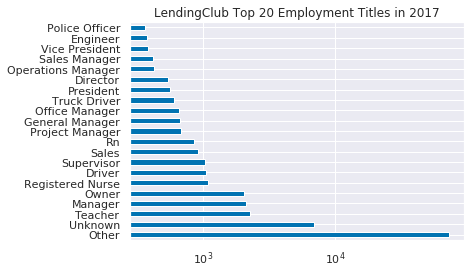

In [292]:
df["emp_title_top_20_cutoff"].value_counts().plot(kind="barh", title="LendingClub Top 20 Employment Titles in 2017", logx=True)

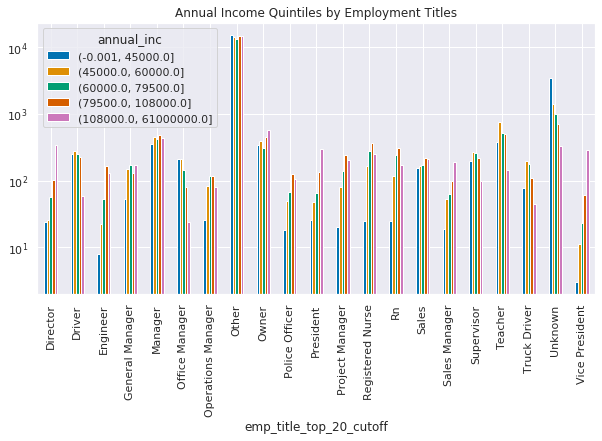

In [309]:
pd.crosstab(df["emp_title_top_20_cutoff"], pd.qcut(df["annual_inc"], 5)).plot(kind="bar", logy=True, figsize=(10,5), title="Annual Income Quintiles by Employment Titles")



Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [310]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-02-11 23:39:13--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.13.198
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.13.198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  1.54MB/s    in 82s     

2020-02-11 23:40:41 (2.38 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [311]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [312]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [0]:
order_products_train_df = pd.read_csv("order_products__train.csv")
order_products_prior_df = pd.read_csv("order_products__prior.csv")
orders_df = pd.read_csv("orders.csv")
products_df = pd.read_csv("products.csv")
aisles_df = pd.read_csv("aisles.csv")
departments_df = pd.read_csv("departments.csv")

In [316]:
orders_df

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [331]:
pd.crosstab(orders_df["order_dow"], orders_df["order_hour_of_day"])

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,48465,51035,51443,53849,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,55671,51584,47079,46728,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,39230,38128,35780,36650,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,36040,35215,33455,34161,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,35034,33857,32249,32751,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645
5,3189,1672,1016,841,910,1574,4866,13434,24015,34232,38313,37915,35714,36296,37407,37508,35860,29955,24310,18741,13322,9515,7498,5265
6,3306,1919,1214,863,802,1136,3243,11319,22960,30839,35665,36994,37121,37564,38748,38093,35562,30398,24157,18346,13392,10501,8532,6087


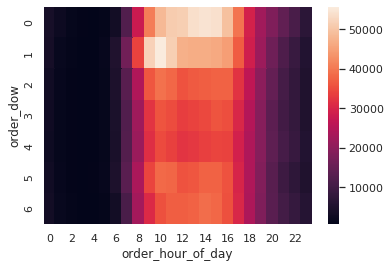

In [0]:
sns.heatmap(pd.crosstab(orders_df["order_dow"], orders_df["order_hour_of_day"]))

Feature Engineering: Timezone (https://github.com/KazukiOnodera/Instacart/blob/master/py_feature/007_timezone.py)

In [0]:
orders = pd.read_csv('orders.csv', usecols=['order_hour_of_day'])

orders.sort_values('order_hour_of_day', inplace=True)
orders.drop_duplicates(inplace=True)
orders.reset_index(drop=True, inplace=True)

def timezone(s):
    if s < 6:
        return 'midnight'
    elif s < 12:
        return 'morning'
    elif s < 18:
        return 'noon'
    else:
        return 'night'


orders['timezone'] = orders.order_hour_of_day.map(timezone)

In [318]:
orders["timezone"]

0     midnight
1     midnight
2     midnight
3     midnight
4     midnight
5     midnight
6      morning
7      morning
8      morning
9      morning
10     morning
11     morning
12        noon
13        noon
14        noon
15        noon
16        noon
17        noon
18       night
19       night
20       night
21       night
22       night
23       night
Name: timezone, dtype: object

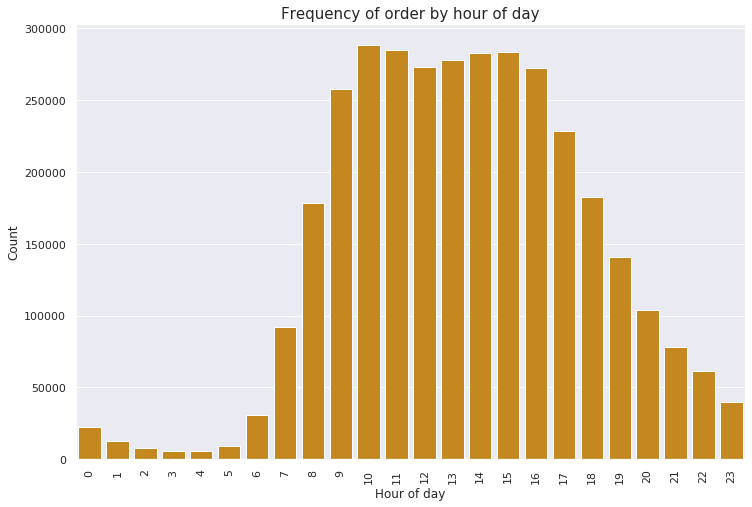

In [321]:
import matplotlib.pyplot as plt
color = sns.color_palette()

plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders_df, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

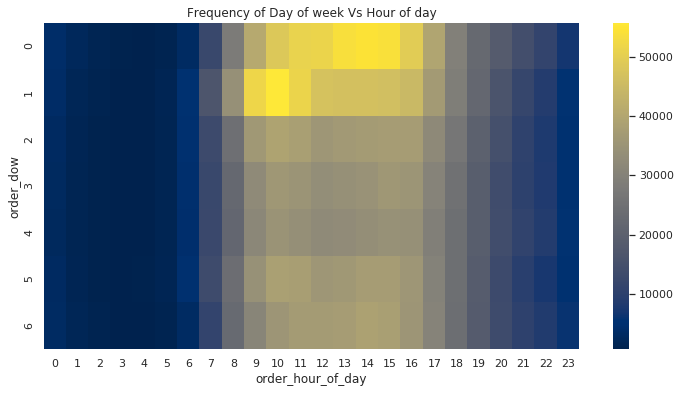

In [323]:
grouped_df = orders_df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df, cmap="cividis")
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()